In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
weather_df=pd.read_csv("weather_data.csv")

In [5]:
price_df=pd.read_csv("price_demand_data.csv")

In [28]:
display(weather_df)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


In [6]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%d/%m/%Y')

In [30]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               243 non-null    datetime64[ns]
 1   Minimum temperature (°C)           242 non-null    float64       
 2   Maximum temperature (°C)           242 non-null    float64       
 3   Rainfall (mm)                      241 non-null    float64       
 4   Evaporation (mm)                   243 non-null    float64       
 5   Sunshine (hours)                   243 non-null    float64       
 6   Direction of maximum wind gust     240 non-null    object        
 7   Speed of maximum wind gust (km/h)  240 non-null    float64       
 8   Time of maximum wind gust          240 non-null    object        
 9   9am Temperature (°C)               242 non-null    float64       
 10  9am relative humidity (%)          242

In [35]:
display(price_df)

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW
...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM


In [7]:
# data cleanning - split the SETTLEMENTDATE to Date and TIME
price_df[['Date','TIME']]=price_df['SETTLEMENTDATE'].str.split(' ', expand=True)

In [37]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
 4   Date            11664 non-null  object 
 5   TIME            11664 non-null  object 
dtypes: float64(1), object(5)
memory usage: 546.9+ KB


In [8]:
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%d/%m/%Y')

In [9]:
price_df.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,TIME
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,0:30
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,1:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,1:30
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,2:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,2:30


In [40]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REGION          11664 non-null  object        
 1   SETTLEMENTDATE  11664 non-null  object        
 2   TOTALDEMAND     11664 non-null  float64       
 3   PRICECATEGORY   11664 non-null  object        
 4   Date            11664 non-null  datetime64[ns]
 5   TIME            11664 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 546.9+ KB


In [32]:
# get max. energy usage of each day
new_price_df[['Date','MAXDEMAND']]=price_df.groupby(['Date'])['TOTALDEMAND'].max().reset_index()
new_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         244 non-null    datetime64[ns]
 1   TOTALDEMAND  244 non-null    float64       
 2   MAXDEMAND    244 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.8 KB


In [20]:
display(new_price_df)

,Date,TOTALDEMAND,MAXDEMAND
0,2021-01-01,5019.64,5019.64
1,2021-01-02,4964.35,4964.35
2,2021-01-03,4503.31,4503.31
3,2021-01-04,4764.18,4764.18
4,2021-01-05,4800.64,4800.64
...,...,...,...
239,2021-08-28,5716.32,5716.32
240,2021-08-29,6227.89,6227.89
241,2021-08-30,6072.91,6072.91
242,2021-08-31,5779.56,5779.56


In [21]:
new_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         244 non-null    datetime64[ns]
 1   TOTALDEMAND  244 non-null    float64       
 2   MAXDEMAND    244 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.8 KB


In [22]:
#merge and combine the data sets
df=pd.merge(new_price_df,weather_df,how="inner", on="Date")

In [23]:
display(df)

,Date,TOTALDEMAND,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,5019.64,5019.64,15.6,29.9,0.0,2.8,9.3,NNE,31.0,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2021-01-02,4964.35,4964.35,18.4,29.0,0.0,9.4,1.3,NNW,30.0,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,2021-01-03,4503.31,4503.31,17.0,26.2,12.6,4.8,7.1,WSW,33.0,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,2021-01-04,4764.18,4764.18,16.0,18.6,2.6,3.8,0.0,SSE,41.0,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,2021-01-05,4800.64,4800.64,15.9,19.1,11.2,1.0,0.0,SSE,35.0,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-08-27,6769.89,6769.89,4.6,13.6,0.0,1.2,3.8,SSW,15.0,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,2021-08-28,5716.32,5716.32,5.3,17.8,0.0,1.6,9.6,N,39.0,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,2021-08-29,6227.89,6227.89,9.1,16.2,0.6,6.4,4.3,NNE,33.0,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,2021-08-30,6072.91,6072.91,6.4,17.6,4.0,1.4,7.4,NNW,50.0,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


In [107]:
df

,Date,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,185853.37,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2021-01-02,197990.13,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,2021-01-03,188742.96,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,2021-01-04,199281.07,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,2021-01-05,207680.91,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-08-27,268490.26,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,2021-08-28,209104.93,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,2021-08-29,224449.35,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,2021-08-30,232158.40,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


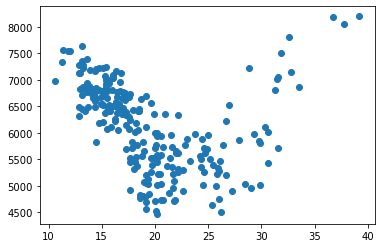

Pearson r is -0.2921912468488674


In [26]:
plt.scatter(df['Maximum temperature (°C)'], df['MAXDEMAND'])
plt.show()
print("Pearson r is",df['Maximum temperature (°C)'].corr(df['MAXDEMAND']))

In [28]:
# delete columns contains not a number valune
df=df.dropna(subset=['MAXDEMAND','Maximum temperature (°C)'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 242
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               242 non-null    datetime64[ns]
 1   TOTALDEMAND                        242 non-null    float64       
 2   MAXDEMAND                          242 non-null    float64       
 3   Minimum temperature (°C)           242 non-null    float64       
 4   Maximum temperature (°C)           242 non-null    float64       
 5   Rainfall (mm)                      241 non-null    float64       
 6   Evaporation (mm)                   242 non-null    float64       
 7   Sunshine (hours)                   242 non-null    float64       
 8   Direction of maximum wind gust     240 non-null    object        
 9   Speed of maximum wind gust (km/h)  240 non-null    float64       
 10  Time of maximum wind gust          240

In [31]:
from sklearn.metrics.cluster import normalized_mutual_info_score
df['max_temp_binned']=pd.cut(df['Maximum temperature (°C)'], bins=4)
df['demand_binned']=pd.cut(df['MAXDEMAND'], bins=4)
display(df)
nmi=normalized_mutual_info_score(df['demand_binned'],df['max_temp_binned'], average_method='min')
print("NMI : "+ str(nmi))

,Date,TOTALDEMAND,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),max_temp_binned,demand_binned
0,2021-01-01,5019.64,5019.64,15.6,29.9,0.0,2.8,9.3,NNE,31.0,...,2,1018.8,28.1,43,5.0,E,13,1015.3,"(24.9, 32.05]","(4469.326, 5403.995]"
1,2021-01-02,4964.35,4964.35,18.4,29.0,0.0,9.4,1.3,NNW,30.0,...,17,1013.3,28.7,38,7.0,SW,4,1008.5,"(24.9, 32.05]","(4469.326, 5403.995]"
2,2021-01-03,4503.31,4503.31,17.0,26.2,12.6,4.8,7.1,WSW,33.0,...,4,1007.7,23.5,59,4.0,SSW,2,1005.2,"(24.9, 32.05]","(4469.326, 5403.995]"
3,2021-01-04,4764.18,4764.18,16.0,18.6,2.6,3.8,0.0,SSE,41.0,...,11,1010.0,18.2,82,8.0,SSW,17,1011.0,"(17.75, 24.9]","(4469.326, 5403.995]"
4,2021-01-05,4800.64,4800.64,15.9,19.1,11.2,1.0,0.0,SSE,35.0,...,13,1012.5,18.2,82,8.0,SSE,19,1013.3,"(17.75, 24.9]","(4469.326, 5403.995]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-08-27,6769.89,6769.89,4.6,13.6,0.0,1.2,3.8,SSW,15.0,...,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4,"(10.571, 17.75]","(6334.94, 7265.885]"
239,2021-08-28,5716.32,5716.32,5.3,17.8,0.0,1.6,9.6,N,39.0,...,7,1018.6,17.4,31,3.0,NNW,24,1013.5,"(17.75, 24.9]","(5403.995, 6334.94]"
240,2021-08-29,6227.89,6227.89,9.1,16.2,0.6,6.4,4.3,NNE,33.0,...,13,1011.4,12.8,84,7.0,S,6,1010.4,"(10.571, 17.75]","(5403.995, 6334.94]"
241,2021-08-30,6072.91,6072.91,6.4,17.6,4.0,1.4,7.4,NNW,50.0,...,15,1016.1,16.8,45,1.0,NNW,28,1013.2,"(10.571, 17.75]","(5403.995, 6334.94]"


NMI : 0.3240703194716581
